https://subscription.packtpub.com/book/application-development/9781785282690/1/ch01lvl1sec11/generating-a-warmingcooling-filter

https://docs.google.com/spreadsheets/d/1E6SuPGsqPvFdkonXufq8hms2zBMQvR0l/edit?fbclid=IwAR222Dh-m27HF3TA6obr4oZBSEFg2iZNTwUxSD3kaSdbdNQXqdTukLtUtnU#gid=2052885446

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
%cd /content/gdrive/MyDrive/image_processing

/content/gdrive/MyDrive/image_processing


# Cartoonizing an image

#### cơ sở lý thuyết 

- để hoạt hình hóa một ảnh ta có 2 phần chính đó là bilateral filter và edge detection

- bilateral filter sẽ làm giảm bảng màu của ảnh để giống bước ảnh hoạt hình hơn vì trong 1 bức tranh hoạt hình họa sỹ chỉ sử dụng rất ít màu sắc cho 1 đối tượng.

- edge detection: sau khi giảm bảng màu của ảnh chúng ta sẽ đi phát hiện các cạnh cảu các đối tượng trong ảnh.

#### các bước để cartoonizing một ảnh 

- apply bilateral filter để giảm color palette của ảnh

- chuyển ảnh gốc sang ảnh xám

- dùng median blur để giảm nhiễu của ảnh 

- sử dụng adptive thresholding để detect ra các biên của 

- kết hợp tô màu cho ảnh từ bưới 1 với các biên ở bước 4

In [3]:
import cv2
from PIL import Image

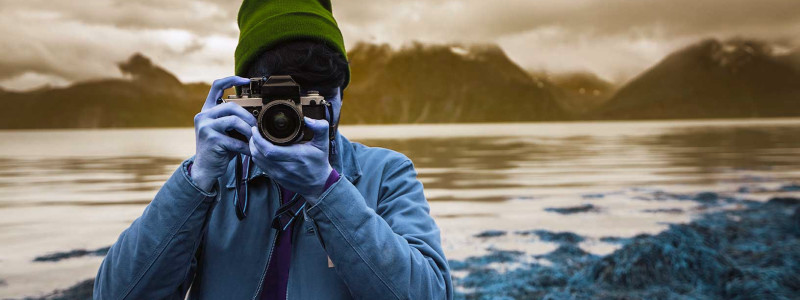

In [4]:
img_rgb = cv2.imread('demo.jpg')

img_src = Image.fromarray(img_rgb)
img_src

#### bilateral filter

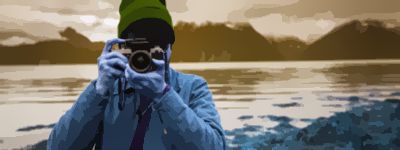

In [5]:
import cv2
img_rgb = cv2.imread('demo.jpg')

# img_small = cv2.resize(img_rgb, (0,0), fx=0.5, fy=0.5)
img_small = cv2.pyrDown(img_rgb)
num_iter = 500
for _ in range(num_iter):
    img_small = cv2.bilateralFilter(img_small, d=9, sigmaColor=9, sigmaSpace=7)
    
img_small = Image.fromarray(img_small)
img_small

#### edge detection

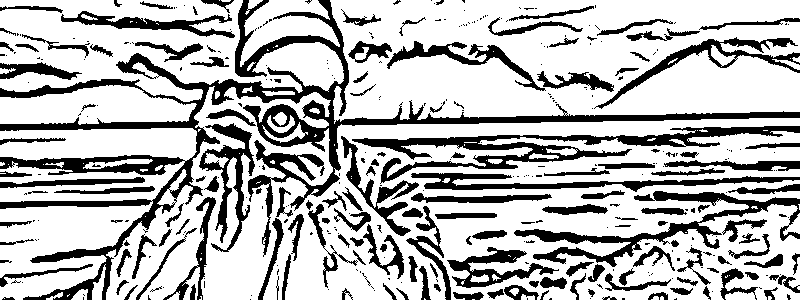

In [6]:
import cv2
from PIL import Image 

img_rgb = cv2.imread('demo.jpg')
img_small = cv2.resize(img_rgb, (0,0), fx=0.5, fy=0.5)

img_small = cv2.pyrDown(img_rgb)
num_iter = 5
for _ in range(num_iter):
    img_small = cv2.bilateralFilter(img_small, d=9, sigmaColor=9, sigmaSpace=7)
    
img_rgb = cv2.pyrUp(img_small)
# convert to grayscale and apply median blur
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
img_blur = cv2.medianBlur(img_gray, 7)

img_edge = cv2.adaptiveThreshold(img_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 2)
# cv2.imwrite('out_img_edge.jpg', img_edge)

img = Image.fromarray(img_edge)
img

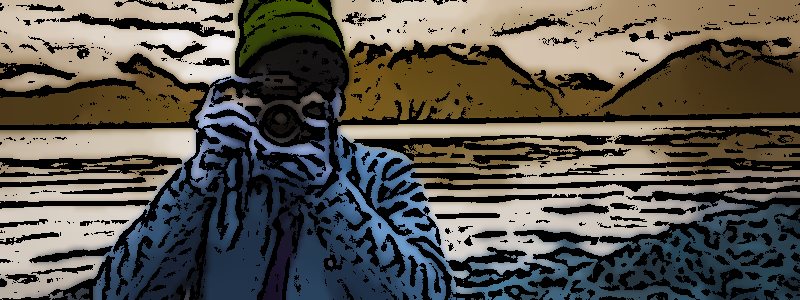

In [7]:
def render(img_rgb):
    numDownSamples = 2 # number of downscaling steps
    numBilateralFilters = 7  # number of bilateral filtering steps

    # -- STEP 1 --
    # downsample image using Gaussian pyramid
    img_color = img_rgb
    for _ in range(numDownSamples):
        img_color = cv2.pyrDown(img_color)

    # repeatedly apply small bilateral filter instead of applying
    # one large filter
    for _ in range(numBilateralFilters):
        img_color = cv2.bilateralFilter(img_color, 9, 9, 7)

    # upsample image to original size
    for _ in range(numDownSamples):
        img_color = cv2.pyrUp(img_color)

    # -- STEPS 2 and 3 --
    # convert to grayscale and apply median blur
    img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
    img_blur = cv2.medianBlur(img_gray, 7)

    # -- STEP 4 --
    # detect and enhance edges
    img_edge = cv2.adaptiveThreshold(img_blur, 255,
        cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 2)

    # -- STEP 5 --
    # convert back to color so that it can be bit-ANDed
    # with color image
    img_edge = cv2.cvtColor(img_edge, cv2.COLOR_GRAY2RGB)
    return cv2.bitwise_and(img_color, img_edge)

img_cartoon = render(cv2.imread('demo.jpg'))
# cv2.imwrite('out_img_cartoon.jpg', img_cartoon)
img = Image.fromarray(img_cartoon)
img

# Creating a black-and-white pencil sketch

https://towardsdatascience.com/generate-pencil-sketch-from-photo-in-python-7c56802d8acb

#### cơ sở lý thuyết

- để chuyển một bức ảnh chụp thành tranh vẽ bút chì chúng ta xử dụng 2 kỹ thuật chính đó là "dodging" và "burning"
- 2 kỹ thuật này được dùng trong các máy in, hoặc những thợ rửa ảnh, các nhiếp ảnh gia sẽ điều chỉnh thời gian phơi sáng của một vùng nhất định của bản in trong phòng tối để làm sáng hoặc tối nó

có 4 bước để tạo ra một bức tranh bút chì từ ảnh

- chuyển đổi ảnh thành ảnh xám
- đảo ngược ảnh xám của ảnh đê có đc ảnh negative
- ứng dụng Gaussian blur vào ảnh negative từ bước 2
- trộn ảnh xám ở bước 1 và ảnh ở bước 3 xử dụng color dodge

In [23]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image

In [20]:
img=cv2.imread("demo.jpg")

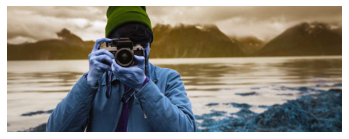

In [22]:
plt.imshow(img)
plt.axis(False)
plt.show()

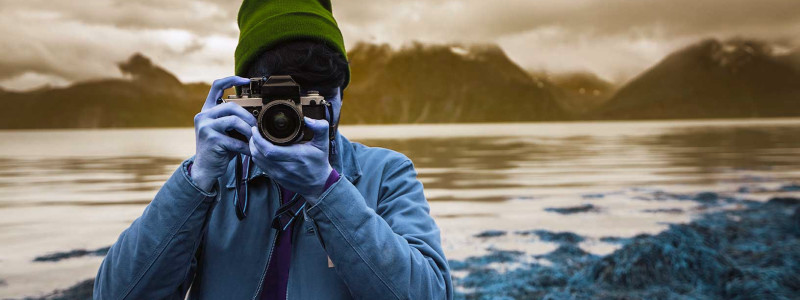

In [21]:
img_src = Image.fromarray(img)
img_src

Step 1: Convert to Grey Image

In [24]:
grey_img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

Step 2: Invert Image

In [25]:
invert_img=cv2.bitwise_not(grey_img)

Step 3: Blur image

In [26]:
blur_img=cv2.GaussianBlur(invert_img, (111,111),0)

Step 4: Invert Blurred Image

In [27]:
invblur_img=cv2.bitwise_not(blur_img)
#invblur_img=255-blur_img

Step 5: Sketch

In [28]:
sketch_img=cv2.divide(grey_img,invblur_img, scale=256.0)

Step 6: Save Sketch

In [30]:
cv2.imwrite('sketch.png', sketch_img)

True

Step 7: Display sketch

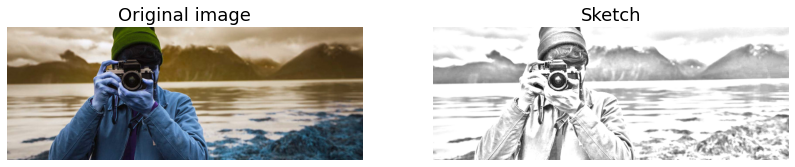

In [32]:
plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
plt.title('Original image', size=18)
plt.imshow(img)
plt.axis('off')
plt.subplot(1,2,2)
plt.title('Sketch', size=18)
rgb_sketch=cv2.cvtColor(sketch_img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_sketch)
plt.axis('off')
plt.show()